 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [28]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [29]:
# Reading whale returns
whale_returns_csvpath = Path("./Resources/whale_returns.csv")                    # Adjust the path to the format expected by the Operating System platform on which the script is being run
whale_returns_df = pd.read_csv(whale_returns_csvpath, index_col="Date")          # Read the csv file into a dataframe, setting the intial index as the Date column
whale_returns_df.index = pd.to_datetime(whale_returns_df.index, format="mixed")  # Correctly index the dataframe

In [30]:
# Show information about the whale_returns data frame
whale_returns_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


In [31]:
# Show the head and tail of the data frame
print("Whale head:")
whale_returns_df.head()

Whale head:


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [32]:
# Show the tail of the data frame
print("Whale tail:")
whale_returns_df.tail()

Whale tail:


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


In [33]:
# Count rows with nulls by summing the results of isnull (which returns True as 1) over the dataframe, even though this is already indicated in the .info call
print("Whale nulls:")
whale_returns_df.isnull().sum()

Whale nulls:


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [34]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna().copy()

In [35]:
# Show the head of the data frame - rows with NaN should now be gone
print("Whale head (post null cleansing):")
whale_returns_df.head()

Whale head (post null cleansing):


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [36]:
# Show the head and tail of the data frame - rows with NaN should now be gone
print("Whale tail (post NaN cleansing):")
whale_returns_df.tail()

Whale tail (post NaN cleansing):


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


In [37]:
print("Whale nulls (post null cleansing):")
whale_returns_df.isnull().sum()

Whale nulls (post null cleansing):


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [38]:
# Reading algorithmic returns
algo_returns_csvpath = Path("./Resources/algo_returns.csv")               # Adjust the path to the format expected by the Operating System platform on which the script is being run
algo_returns_df = pd.read_csv(algo_returns_csvpath, index_col="Date")     # Read the csv file into a dataframe, setting the intial index as the Date column

In [39]:
# Convert the dates to a DateTimeIndex
algo_returns_df.index = pd.to_datetime(algo_returns_df.index, format="mixed") # Correctly index the dataframe

In [40]:
# Count nulls
print("Number of nulls per column")
algo_returns_df.isnull().sum()

Number of nulls per column


Algo 1    0
Algo 2    6
dtype: int64

In [41]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna().copy()

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [42]:
# Reading S&P TSX 60 Closing Prices
sptsx60_returns_csvpath = Path("./Resources/sp_tsx_history.csv")             # Adjust the path to the format expected by the Operating System platform on which the script is being run
sptsx60_returns_df = pd.read_csv(sptsx60_returns_csvpath, index_col="Date")  # Read the CSV into a data frame while converting the Date column into the index and dropping it

In [43]:
# Convert the dates to a DateTimeIndex
sptsx60_returns_df.index = pd.to_datetime(sptsx60_returns_df.index, format="mixed") # Correctly index the dataframe

In [44]:
# Check Data Types
sptsx60_returns_df.dtypes

Close    object
dtype: object

In [45]:
# Fix Data Types, since the Close amount has non-numeric characters such as the dollar signs and commas
sptsx60_returns_df["Close"] = sptsx60_returns_df["Close"].str.replace("$", "")   # Remove any dollar sign ($) from the Close column
sptsx60_returns_df["Close"] = sptsx60_returns_df["Close"].str.replace(",", "")   # Remove any comma (,) from the Close column
sptsx60_returns_df["Close"] = sptsx60_returns_df["Close"].astype("float")        # Convert the Close column to a float data type

In [46]:
sptsx60_returns_df.head()  # Display the column data after removing non-numeric characters

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [47]:
# Calculate Daily Returns
sptsx60_daily_returns = sptsx60_returns_df.pct_change()
sptsx60_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [48]:
# Drop nulls
sptsx60_daily_returns = sptsx60_daily_returns.dropna().copy()
sptsx60_daily_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [49]:
# Rename `Close` Column to be specific to this portfolio.
sptsx60_daily_returns.rename(columns={"Close": "S&P TSX"}, inplace=True)  # Rename the Close column to S&P TSX

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [50]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
joined_df = pd.concat([whale_returns_df, algo_returns_df, sptsx60_daily_returns], axis="columns", join="inner")
joined_df.columns = joined_df.columns.str.upper()        # For consistency convert all column names upper case.
joined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGO 1,ALGO 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

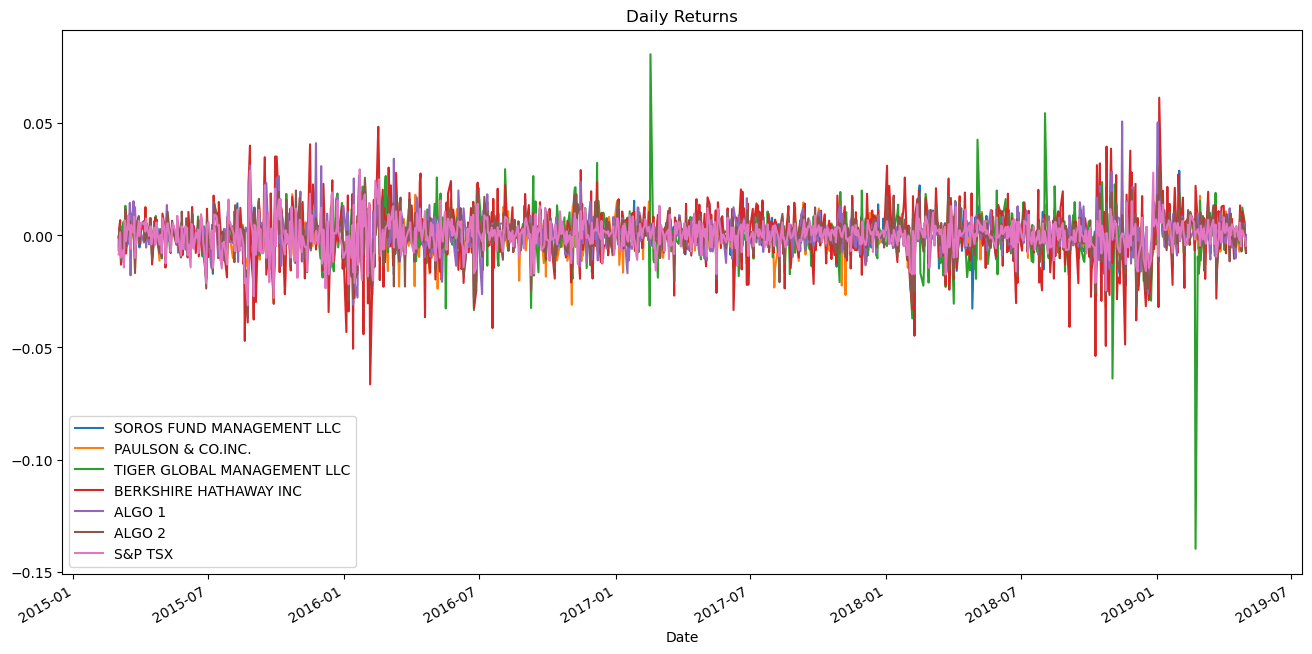

In [51]:
# Plot daily returns of all portfolios
result = joined_df.plot(kind="line", figsize=(16,8), title="Daily Returns")

#### Calculate and Plot cumulative returns.

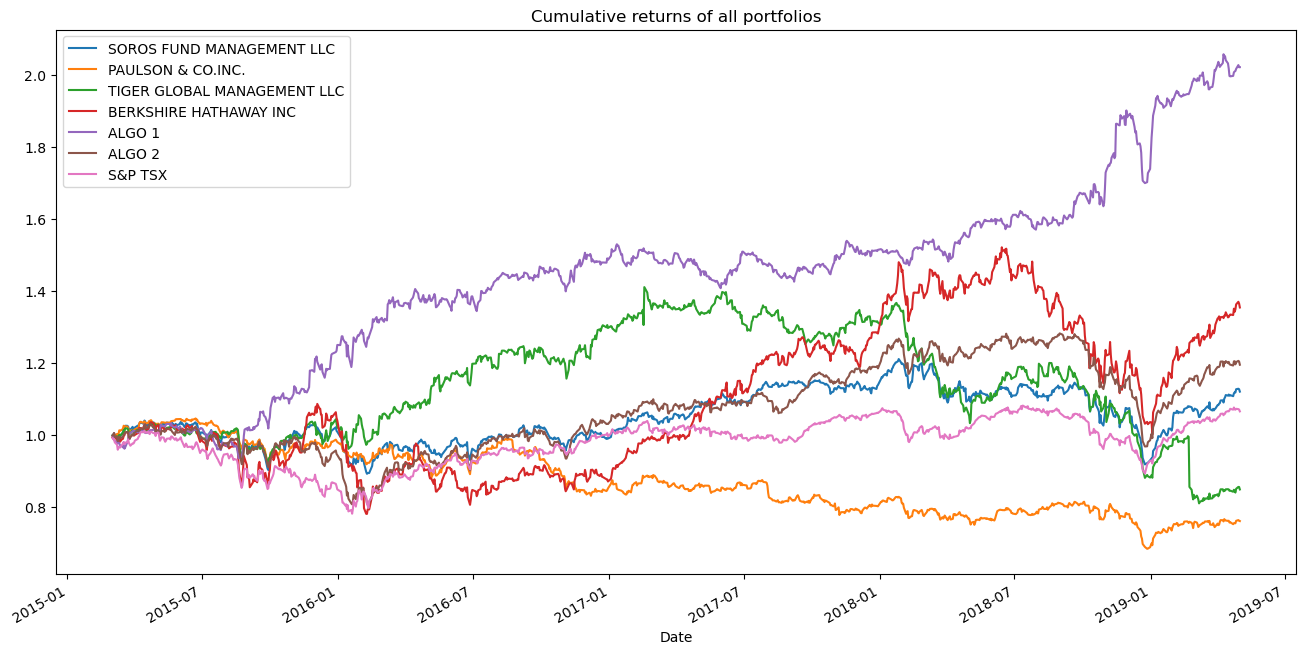

In [52]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+joined_df).cumprod()

# Plot cumulative returns
cumulative_returns_plot = cumulative_returns.plot( kind="line", figsize=(16,8), title="Cumulative returns of all portfolios")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


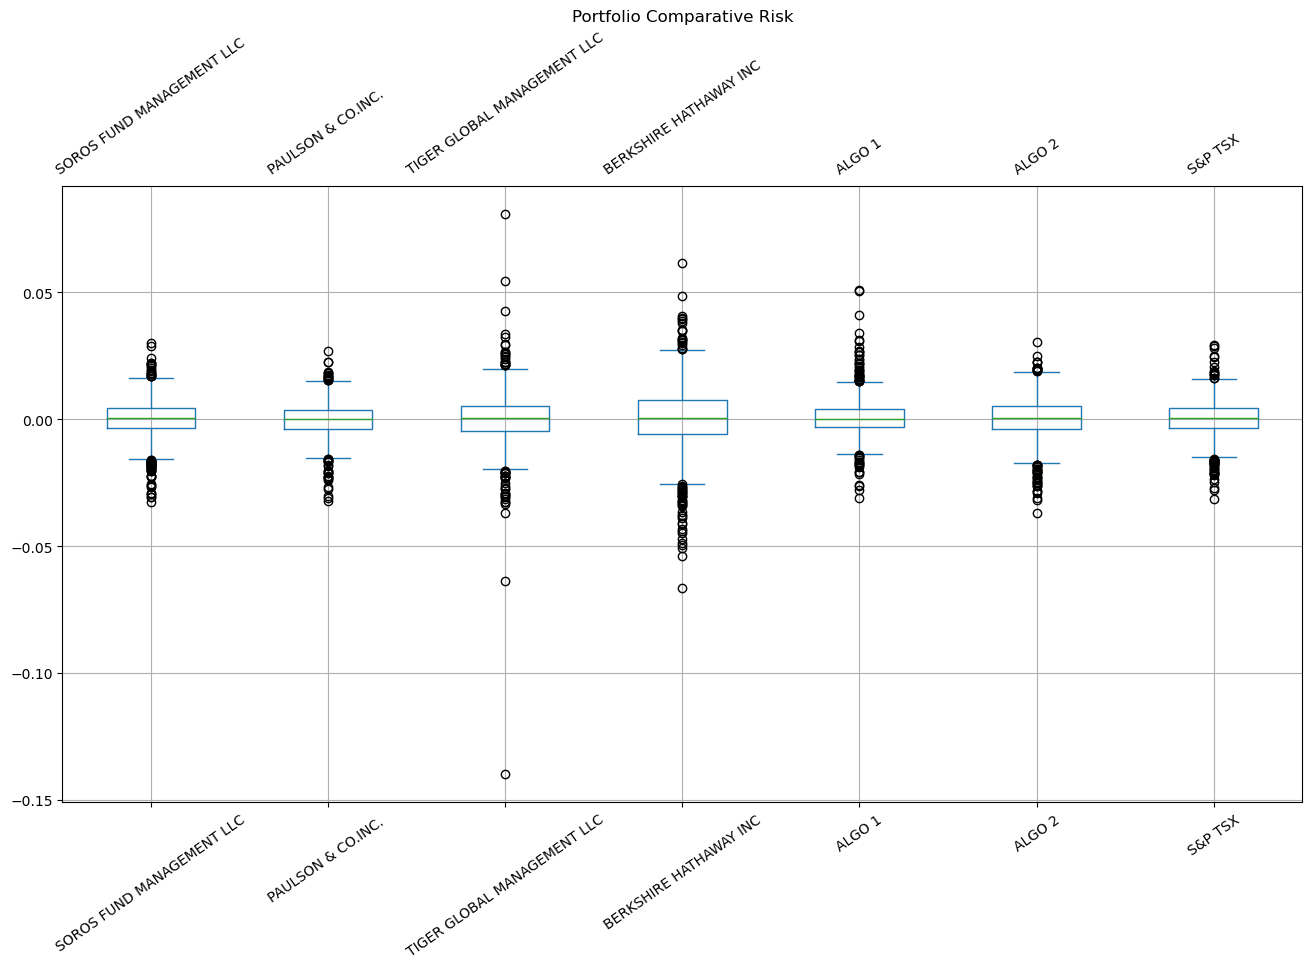

In [89]:
# Bonus: A single plot with all the portfolios laid out side by side has been included to perform a comparative analysis more easily.

all_box_plot = joined_df.plot.box(title="Portfolio Comparative Risk", figsize=(16,8), grid=True )  # Add a title, resize the image and add a grid
all_box_plot = all_box_plot.tick_params( axis="x", labelrotation=35, labeltop=True ) # Rotate the x axis labels so they don't overlap. Also add labels to the top


### Calculate Standard Deviations

In [91]:
# Calculate the daily standard deviations of all portfolios
print("The daily standard deviations of all portfolios (unsorted) is: ")
daily_std = joined_df.std()
daily_std

The daily standard deviations of all portfolios (unsorted) is: 


SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
ALGO 1                         0.007589
ALGO 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [92]:
# Calculate  the daily standard deviation of S&P TSX 60
sptsx60_std = joined_df["S&P TSX"].std()

# Determine which portfolios are riskier than the S&P TSX 60
daily_std = daily_std.sort_values(ascending=False)   # Sort the data frame in descending order by std values

print( f"The Standard Deviation of the S&P TSX 60 is: {round(sptsx60_std,6)}") # Show the S&P TSX Standard deviation value rounding it to 6 decimal places for consistency with the next output
print("Portfolios that are riskier than the S&P TSX 60 are: ")
daily_std[daily_std > sptsx60_std].dropna()  # Show the data frame dropping values less than the S&P TSX 60 (see acknowledgement below)
# Code snippet acknowledgement: ComputerFellow, (2015 December 12). "Filter rows of pandas dataframe whose values are lower than 0. StackOverFlow. https://stackoverflow.com/a/34243246

The Standard Deviation of the S&P TSX 60 is: 0.007034
Portfolios that are riskier than the S&P TSX 60 are: 


BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
ALGO 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
ALGO 1                         0.007589
dtype: float64

### Calculate the Annualized Standard Deviation

In [93]:
# Calculate the annualized standard deviation (252 trading days)
print("The annualised standard deviation (across 252 trading days) of each portfolio is: ")
joined_annualized_std = daily_std * np.sqrt(252)
joined_annualized_std

The annualised standard deviation (across 252 trading days) of each portfolio is: 


BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
ALGO 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
ALGO 1                         0.120470
S&P TSX                        0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

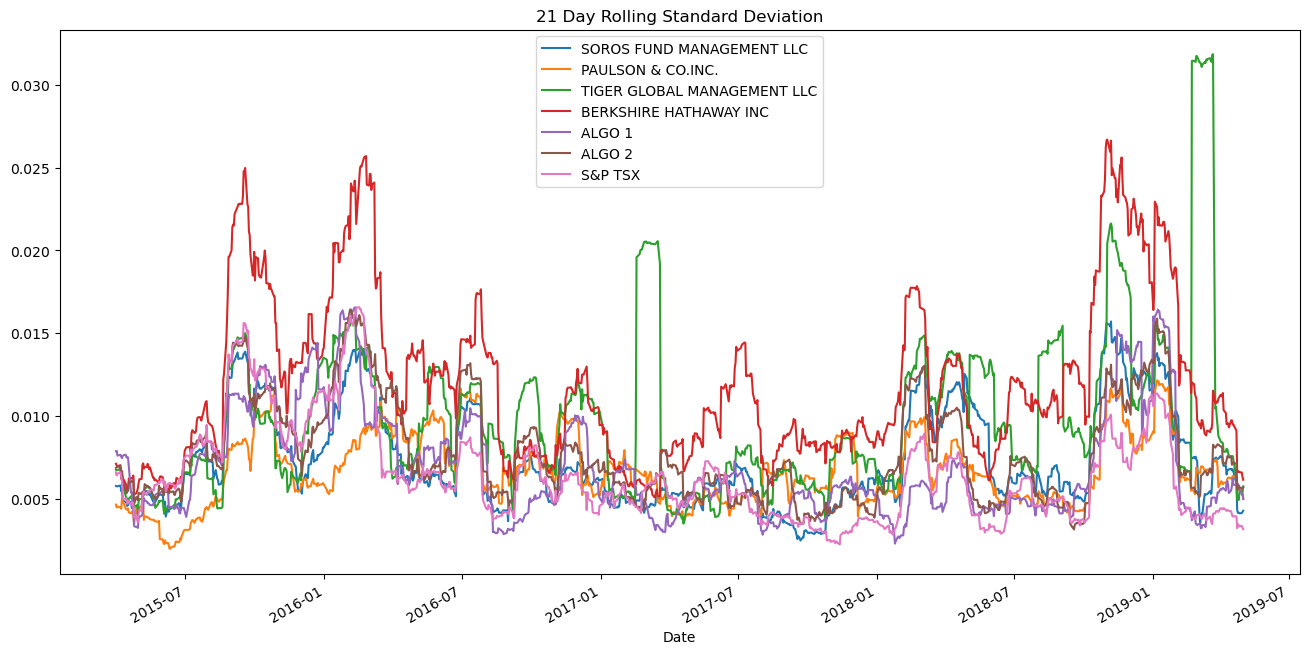

In [95]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

all_roll_std_21_df = joined_df.rolling(window=21).std()       # Calculate the 21 moving standard deviation

# Plot the rolling standard deviation
plot_output = all_roll_std_21_df.plot(kind="line", figsize=(16,8), title="21 Day Rolling Standard Deviation" )

### Calculate and plot the correlation

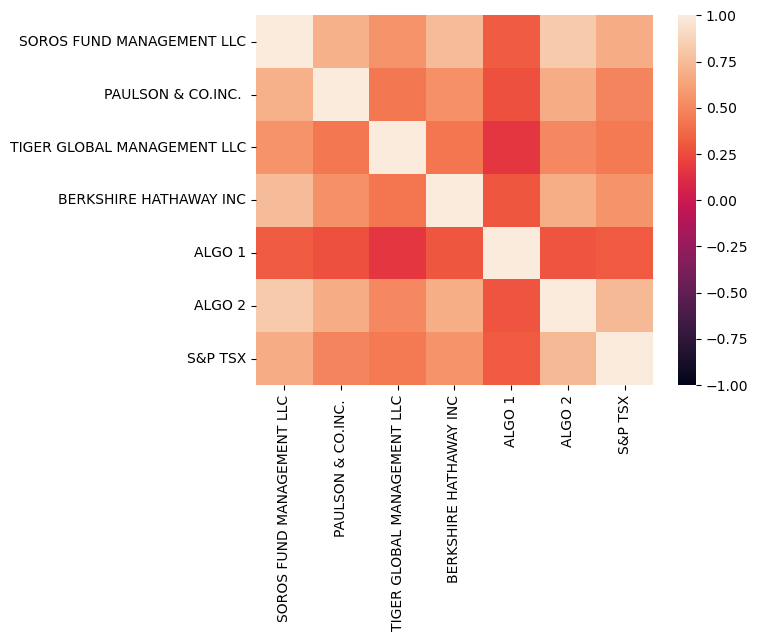

In [107]:
# Calculate the correlation
correlation = joined_df.corr()

# Display de correlation matrix
# Use the `heatmap` function from the Seaborn library to visualize correlations
heatmap_output = sns.heatmap(correlation, vmin=-1, vmax=1)
heatmap_output = heatmap_output.tick_params( axis="x", labelrotation=90 ) # Rotate the x axis labels so they don't overlap.


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

The covariance of all daily returns of BERKSHIRE HATHAWAY INC vs. S&P TSX is: 5.027336077110013e-05
The variance of the S&P TSX is: 4.9479515915131015e-05
The beta for BERKSHIRE HATHAWAY INC vs. S&P TSX is: 1.0160439091063613


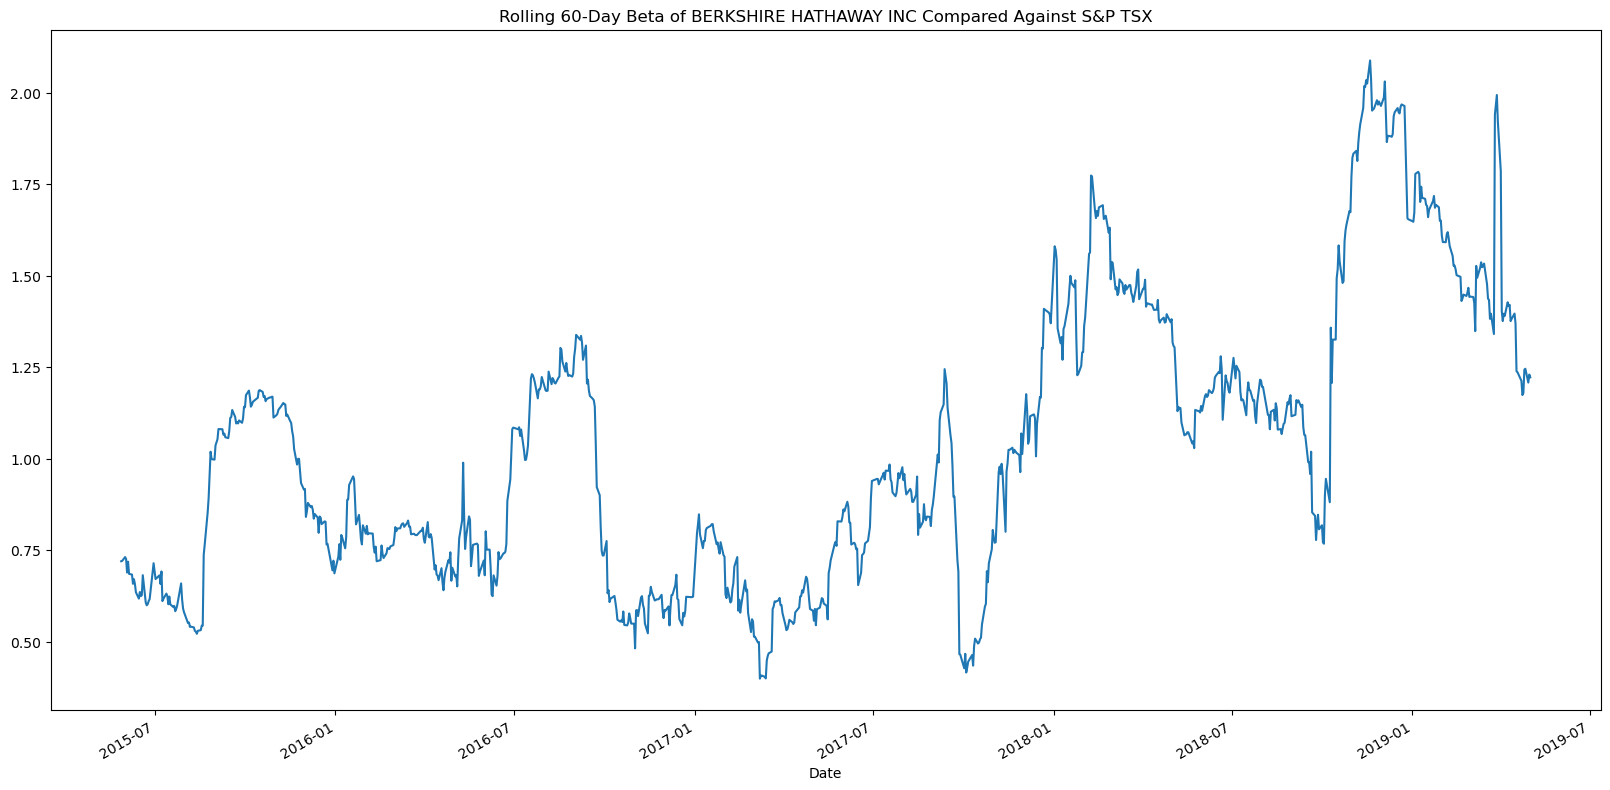

In [110]:
# Calculate covariance of a single portfolio
# Set-up some variables (constants) to minimise error and duplication
chosen_portfolio = "BERKSHIRE HATHAWAY INC"  # (constant) Name of the portfolio chosen for the comparison. 
compared_portfolio = "S&P TSX"               # (constant) Name of the portfolio we will be comparing against. 
beta_rolling_window = 60                     # (constant) Window size in days for the rolling beta plot.

# Calculate covariance of all daily returns of Berkshire Hathaway vs. the S&P 60 TSX
bks_vs_sp60tsx_covariance = joined_df[chosen_portfolio].cov(joined_df[compared_portfolio])
print(f"The covariance of all daily returns of {chosen_portfolio} vs. {compared_portfolio} is: {bks_vs_sp60tsx_covariance}")

# Calculate variance of S&P TSX
sptsx_variance = joined_df[compared_portfolio].var()
print(f"The variance of the {compared_portfolio} is: {sptsx_variance}")

# Computing beta of Berkshire Hathaway vs the S&P 60 TSX
bks_beta = bks_vs_sp60tsx_covariance / sptsx_variance
print(f"The beta for {chosen_portfolio} vs. {compared_portfolio} is: {bks_beta}")

# Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

rolling_variance = joined_df[compared_portfolio].rolling(window = beta_rolling_window).var()                              # Calculate the variance of the compared portfolio
rolling_covariance = joined_df[chosen_portfolio].rolling(window = beta_rolling_window).cov(joined_df[compared_portfolio]) # Calculate the covariance of the selected vs the compared potfolio

rolling_beta = rolling_covariance / rolling_variance            # Calculate the rolling beta
result = rolling_beta.plot(figsize=(20,10), title = f"Rolling {beta_rolling_window}-Day Beta of {chosen_portfolio} Compared Against {compared_portfolio}")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!

---